In [48]:
import pandas as pd
# reading dataset
data = pd.read_csv("../grid/grid-export.csv")

data.tail()

,Day,PM1(mcg/m³),PM10(mcg/m³),PM2.5(mcg/m³),AQI US,NO(mcg/m³),NO2(mcg/m³),CH2O(mcg/m³),SO2(mcg/m³),Temperature(°C),Humidity(%)
434,2022-08-28,6.20,70.48,16.81,59.52,8.89,27.58,0.0,21.67,24.34,31.41
435,2022-08-29,5.39,66.65,15.50,55.99,28.52,34.23,0.0,20.19,23.77,35.32
436,2022-08-30,5.11,64.76,14.81,54.21,5.69,30.39,0.0,19.31,23.57,36.31
437,2022-08-31,5.58,69.77,15.52,56.70,3.86,27.57,0.0,18.83,24.97,32.14
438,2022-09-01,5.63,71.57,16.26,58.86,4.77,28.98,0.0,20.86,25.68,31.01


In [49]:
data.drop('AQI US', axis=1, inplace=True)
data.drop('NO(mcg/m³)', axis=1, inplace=True)
data.drop('NO2(mcg/m³)', axis=1, inplace=True)
data.drop('CH2O(mcg/m³)', axis=1, inplace=True)
data.drop('SO2(mcg/m³)', axis=1, inplace=True)
data.drop('Temperature(°C)', axis=1, inplace=True)
data.drop('Humidity(%)', axis=1, inplace=True)



In [50]:
pm1 = data.drop('PM2.5(mcg/m³)', axis=1)
pm1 = pm1.drop('PM10(mcg/m³)', axis=1)

In [51]:
pm1.head()

,Day,PM1(mcg/m³)
0,2021-06-20,6.26
1,2021-06-21,5.61
2,2021-06-22,6.38
3,2021-06-23,6.43
4,2021-06-24,5.66


In [52]:
# python code to rename the columns
pm1.rename(columns={'Day':'ds','PM1(mcg/m³)':'y'},inplace=True)

In [53]:
# importing python time series packages
from prophet import Prophet

# initialiazing the model with 95% confidence interval
model = Prophet(interval_width= 0.80)

# train model
model.fit(pm1)

17:15:23 - cmdstanpy - INFO - Chain [1] start processing
17:15:23 - cmdstanpy - INFO - Chain [1] done processing


In [54]:
# forecasting for future
future = model.make_future_dataframe(periods=2, freq='M')

In [55]:
# forecast predictions
forecast = model.predict(future)

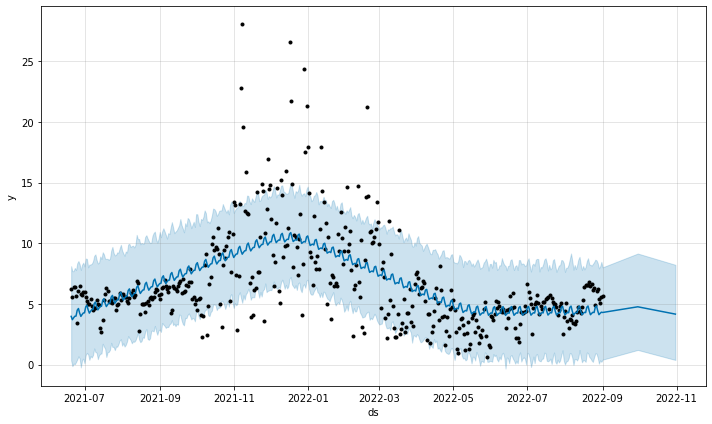

In [56]:
# visualizing the forecat predictions
fig1 = model.plot(forecast)

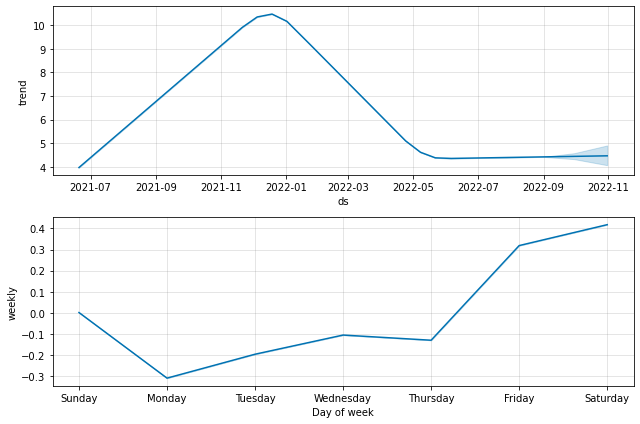

In [57]:
# weekly seasonality and yearly seasonality
fig2 = model.plot_components(forecast)

In [58]:
pm2 = data.drop('PM1(mcg/m³)', axis=1)
pm2 = pm2.drop('PM10(mcg/m³)', axis=1)

In [64]:
# python code to rename the columns
pm2.rename(columns={'Day':'ds','PM2.5(mcg/m³)':'y'},inplace=True)

In [65]:
pm2.head()

,ds,y
0,2021-06-20,21.02
1,2021-06-21,15.63
2,2021-06-22,11.60
3,2021-06-23,12.40
4,2021-06-24,11.68


In [66]:

# initialiazing the model with 95% confidence interval
model = Prophet(interval_width= 0.80)

# train model
model.fit(pm2)

# forecasting for future
future = model.make_future_dataframe(periods=2, freq='M')
# forecast predictions
forecast = model.predict(future)

17:17:16 - cmdstanpy - INFO - Chain [1] start processing
17:17:16 - cmdstanpy - INFO - Chain [1] done processing


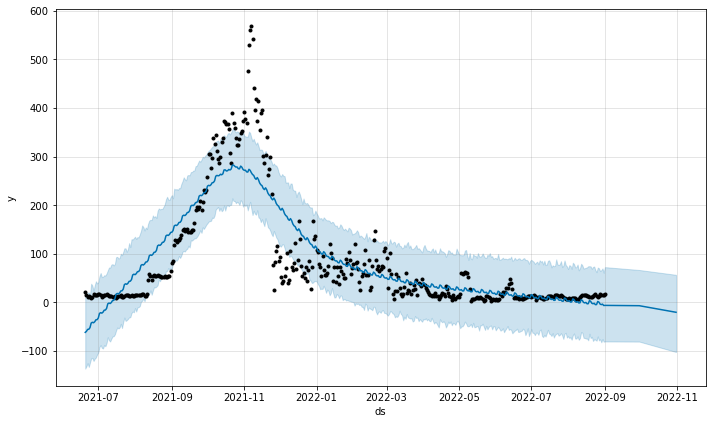

In [67]:
# visualizing the forecat predictions
fig1 = model.plot(forecast)

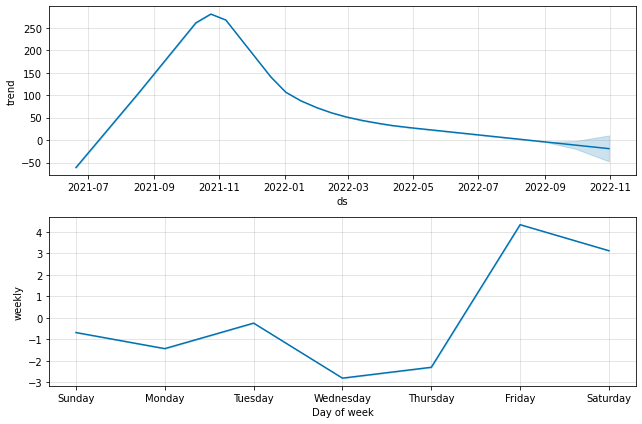

In [68]:
# weekly seasonality and yearly seasonality
fig2 = model.plot_components(forecast)

In [69]:
pm10 = data.drop('PM2.5(mcg/m³)', axis=1)
pm10 = pm10.drop('PM1(mcg/m³)', axis=1)

In [74]:
# python code to rename the columns
pm10.rename(columns={'Day':'ds','PM10(mcg/m³)':'y'},inplace=True)

In [75]:

# initialiazing the model with 95% confidence interval
model = Prophet(interval_width= 0.80)

# train model
model.fit(pm10)

# forecasting for future
future = model.make_future_dataframe(periods=2, freq='M')
# forecast predictions
forecast = model.predict(future)

17:22:04 - cmdstanpy - INFO - Chain [1] start processing
17:22:04 - cmdstanpy - INFO - Chain [1] done processing


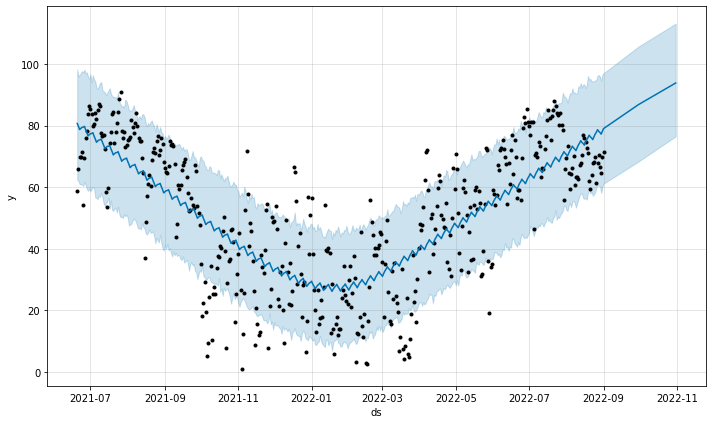

In [76]:
# visualizing the forecat predictions
fig1 = model.plot(forecast)

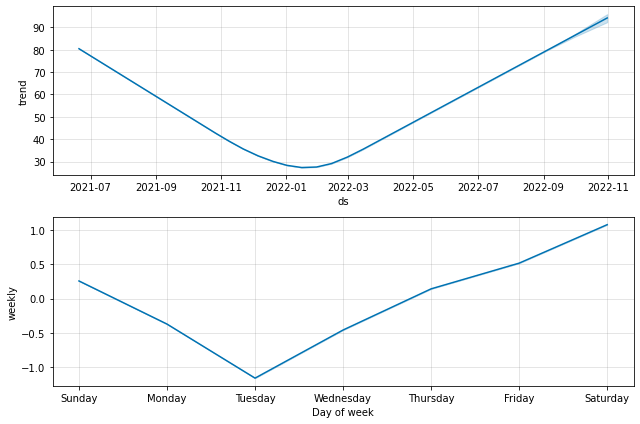

In [77]:
# weekly seasonality and yearly seasonality
fig2 = model.plot_components(forecast)

In [89]:
# importing dataset
dataset = pd.read_csv('../pm2_data.csv')

dataset.head()

,Unnamed: 0,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
0,0,Bishkek,PM2.5 - Principal,2019-02-06 06:00:00,2019,2,6,6,-999.0,-999,NaN,12.0,UG/M3,1 Hr,Valid
1,1,Bishkek,PM2.5 - Principal,2019-02-06 07:00:00,2019,2,6,7,17.0,61,Moderate,20.0,UG/M3,1 Hr,Valid
2,2,Bishkek,PM2.5 - Principal,2019-02-06 08:00:00,2019,2,6,8,19.1,66,Moderate,21.0,UG/M3,1 Hr,Valid
3,3,Bishkek,PM2.5 - Principal,2019-02-06 09:00:00,2019,2,6,9,22.4,73,Moderate,25.0,UG/M3,1 Hr,Valid
4,4,Bishkek,PM2.5 - Principal,2019-02-06 10:00:00,2019,2,6,10,30.9,91,Moderate,39.0,UG/M3,1 Hr,Valid


In [90]:
dataset.drop('Unnamed: 0', axis=1, inplace=True)
dataset.drop('Site', axis=1, inplace=True)
dataset.drop('Parameter', axis=1, inplace=True)
dataset.drop('Year', axis=1, inplace=True)
dataset.drop('Month', axis=1, inplace=True)
dataset.drop('Day', axis=1, inplace=True)
dataset.drop('Hour', axis=1, inplace=True)
dataset.drop('NowCast Conc.', axis=1, inplace=True)
dataset.drop('AQI Category', axis=1, inplace=True)
dataset.drop('Raw Conc.', axis=1, inplace=True)
dataset.drop('Conc. Unit', axis=1, inplace=True)
dataset.drop('Duration', axis=1, inplace=True)
dataset.drop('QC Name', axis=1, inplace=True)


In [100]:

import numpy as np
dataset['AQI'].replace(-999, np.nan, inplace=True)

In [101]:
dataset.head()

,Date (LT),AQI
0,2019-02-06 06:00:00,NaN
1,2019-02-06 07:00:00,61.0
2,2019-02-06 08:00:00,66.0
3,2019-02-06 09:00:00,73.0
4,2019-02-06 10:00:00,91.0


In [103]:
dataset.isnull().sum()

Date (LT)      0
AQI          202
dtype: int64

In [104]:
dataset = dataset.bfill().ffill()

In [105]:
dataset.isnull().sum()

Date (LT)    0
AQI          0
dtype: int64

In [106]:
dataset["Date (LT)"] = pd.to_datetime(dataset["Date (LT)"])

In [107]:
# python code to rename the columns
dataset.rename(columns={'Date (LT)':'ds','AQI':'y'},inplace=True)

In [108]:

# initialiazing the model with 95% confidence interval
model = Prophet(interval_width= 0.80)

# train model
model.fit(dataset)

# forecasting for future
future = model.make_future_dataframe(periods=2, freq='M')
# forecast predictions
forecast = model.predict(future)

17:45:56 - cmdstanpy - INFO - Chain [1] start processing
17:46:41 - cmdstanpy - INFO - Chain [1] done processing


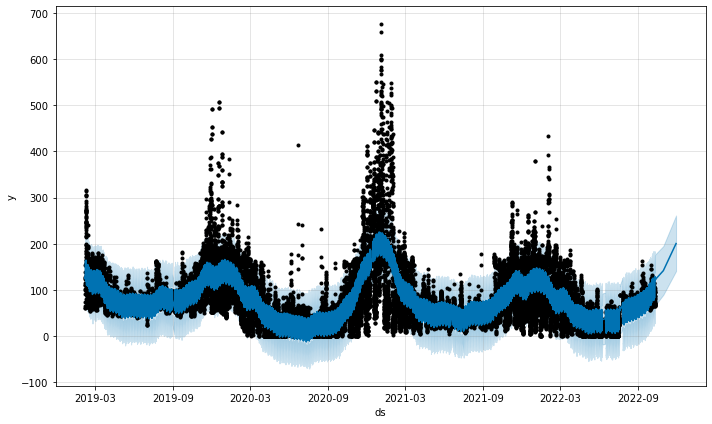

In [109]:
# visualizing the forecat predictions
fig1 = model.plot(forecast)

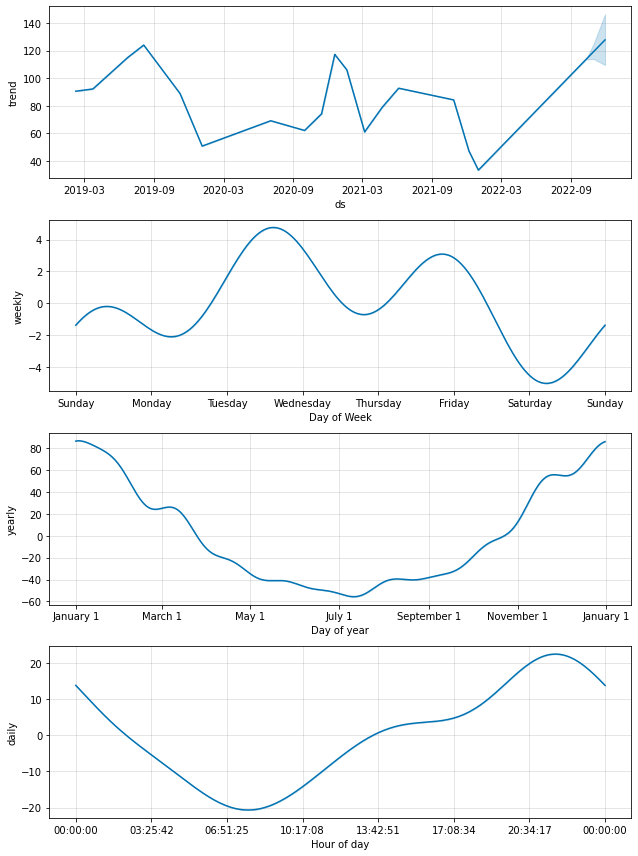

In [110]:
# weekly seasonality and yearly seasonality
fig2 = model.plot_components(forecast)